In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
people=pd.DataFrame({'Age':[21,2,18,221,34],'ageGroup':['adult','child','adult','elderly','child'],'height':[6.0,3,5.7,5,-7],'status':['single','married','married','widowed','married'],'yearsmarried':[-1,0,20,2,3]})


In [4]:
print(people)

   Age ageGroup  height   status  yearsmarried
0   21    adult     6.0   single            -1
1    2    child     3.0  married             0
2   18    adult     5.7  married            20
3  221  elderly     5.0  widowed             2
4   34    child    -7.0  married             3


In [6]:
print(people)

   Age ageGroup  height   status  yearsmarried
0   21    adult     6.0   single            -1
1    2    child     3.0  married             0
2   18    adult     5.7  married            20
3  221  elderly     5.0  widowed             2
4   34    child    -7.0  married             3


In [7]:
# 1.The age should be in the range 0-150.
# 
# 2.The age should be greater than yearsmarried.
#
# 3.The status should be married or single or widowed.
#
# 4.If age is less than 18 the agegroup should be child, if age is between 18 and 65 the agegroup
# should be adult, if age is more than 65 the agegroup should be elderly.


people=people.assign(firstRule=lambda x:(x['Age']>=0)&(x['Age']<=150),
                     secondRule=lambda x:x['Age']>x['yearsmarried'],
                     thirdRule=lambda x:((x['status']=='single') | (x['status']=='widowed')| (x['status']=='married')),
                     fourthRule=lambda x:(((x['Age']<18)&(x['ageGroup']=='child'))|(((x['Age']>=18)&(x['Age']<=65))&(x['ageGroup']=='adult'))|((x['Age']>65)&(x['ageGroup']=='elderly'))))


In [10]:
people

,Age,ageGroup,height,status,yearsmarried,firstRule,secondRule,thirdRule,fourthRule
0,21,adult,6.0,single,-1,True,True,True,True
1,2,child,3.0,married,0,True,True,True,True
2,18,adult,5.7,married,20,True,False,True,True
3,221,elderly,5.0,widowed,2,False,True,True,True
4,34,child,-7.0,married,3,True,True,True,False


In [18]:
people['firstRule']=people['firstRule'].astype(int)
people['secondRule']=people['secondRule'].astype(int)
people['thirdRule']=people['thirdRule'].astype(int)
people['fourthRule']=people['fourthRule'].astype(int)
people

,Age,ageGroup,height,status,yearsmarried,firstRule,secondRule,thirdRule,fourthRule
0,21,adult,6.0,single,-1,1,1,1,1
1,2,child,3.0,married,0,1,1,1,1
2,18,adult,5.7,married,20,1,0,1,1
3,221,elderly,5.0,widowed,2,0,1,1,1
4,34,child,-7.0,married,3,1,1,1,0


In [19]:
people[['firstRule','secondRule','thirdRule','fourthRule']].describe()


,firstRule,secondRule,thirdRule,fourthRule
count,5.000000,5.000000,5.0,5.000000
mean,0.800000,0.800000,1.0,0.800000
std,0.447214,0.447214,0.0,0.447214
min,0.000000,0.000000,1.0,0.000000
25%,1.000000,1.000000,1.0,1.000000
50%,1.000000,1.000000,1.0,1.000000
75%,1.000000,1.000000,1.0,1.000000
max,1.000000,1.000000,1.0,1.000000


Count of all rules : no of non-empty values = 5

Mean = Sum of Values in (Rule 1, Rule 2, Rule 3, Rule 4)/Total Number of entries

Std Deviation = Standard Deviation of each column.

25%,50%,75% : No of values less than the given percentile Here only 0 is present so count of such values is 1 in each case.
Min = Minimum of all values in respective column.

Max = Maximum of all the values in respective column.

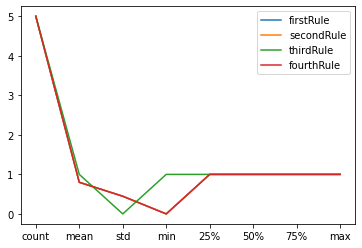

In [20]:
people[['firstRule','secondRule','thirdRule','fourthRule']].describe().plot()

In [26]:
rules_df=people[['firstRule','secondRule','thirdRule','fourthRule']]
rules_df

,firstRule,secondRule,thirdRule,fourthRule
0,1,1,1,1
1,1,1,1,1
2,1,0,1,1
3,0,1,1,1
4,1,1,1,0


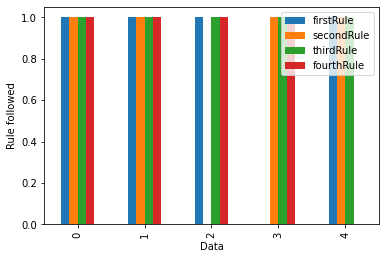

In [43]:
rules_df.plot(y=['firstRule','secondRule','thirdRule','fourthRule'],kind='bar')
plt.xlabel('Data')
plt.legend(loc='upper right')
plt.ylabel('Rule followed')
plt.show()

Graph is plotted between row number and boolean value true or false

Each color strip represent a rule if the rule is not violated it is having 1 value on y axis.

Rule 1 is violated once and Rule 3 is followed in all the cases

For 1st row : All rules are followed

For 2nd row :All rules are followed

For 3rd row : All rules are followed except Rule 2

For 4th row : All rules are followed except Rule 1

For 5th row : All rules are followed except Rule 4